In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
auction=pd.read_csv(r'C:\Users\Vinayak\Downloads\auction.csv')
auction.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.0,2.230949,schadenfreud,0.0,99.0,177.5,Cartier wristwatch,3 day auction
1,1638893549,100.0,2.600116,chuik,0.0,99.0,177.5,Cartier wristwatch,3 day auction
2,1638893549,120.0,2.600810,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
3,1638893549,150.0,2.601076,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
4,1638893549,177.5,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.5,Cartier wristwatch,3 day auction


In [5]:
auction.describe()

,auctionid,bid,bidtime,bidderrate,openbid,price
count,1.068100e+04,10681.000000,10681.000000,10670.000000,10681.000000,10681.000000
mean,4.136148e+09,207.586109,3.979628,31.936739,52.246256,335.043589
std,2.489918e+09,323.037396,2.353386,120.594074,168.453245,433.566009
min,1.638844e+09,0.010000,0.000567,-4.000000,0.010000,26.000000
25%,3.015329e+09,72.000000,1.949931,1.000000,1.000000,186.510000
50%,3.020526e+09,140.000000,4.140833,5.000000,4.990000,228.490000
75%,8.212136e+09,210.000000,6.448060,21.000000,50.000000,255.000000
max,8.215611e+09,5400.000000,6.999990,3140.000000,5000.000000,5400.000000


In [6]:
auction.isnull().sum()

auctionid        0
bid              0
bidtime          0
bidder          16
bidderrate      11
openbid          0
price            0
item             0
auction_type     0
dtype: int64

In [7]:
auction.shape

(10681, 9)

In [10]:
auction.dropna(axis=0)

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.00,2.230949,schadenfreud,0.0,99.00,177.50,Cartier wristwatch,3 day auction
1,1638893549,100.00,2.600116,chuik,0.0,99.00,177.50,Cartier wristwatch,3 day auction
2,1638893549,120.00,2.600810,kiwisstuff,2.0,99.00,177.50,Cartier wristwatch,3 day auction
3,1638893549,150.00,2.601076,kiwisstuff,2.0,99.00,177.50,Cartier wristwatch,3 day auction
4,1638893549,177.50,2.909826,eli.flint@flightsafety.co,4.0,99.00,177.50,Cartier wristwatch,3 day auction
...,...,...,...,...,...,...,...,...,...
10676,8214889177,61.00,6.359155,714ark,15.0,0.01,90.01,Xbox game console,7 day auction
10677,8214889177,76.00,6.359294,rjdorman,1.0,0.01,90.01,Xbox game console,7 day auction
10678,8214889177,90.00,6.428738,baylorjeep,3.0,0.01,90.01,Xbox game console,7 day auction
10679,8214889177,88.00,6.760081,jasonjasonparis,18.0,0.01,90.01,Xbox game console,7 day auction


In [12]:
auction.duplicated().sum()

0

<AxesSubplot:xlabel='item', ylabel='price'>

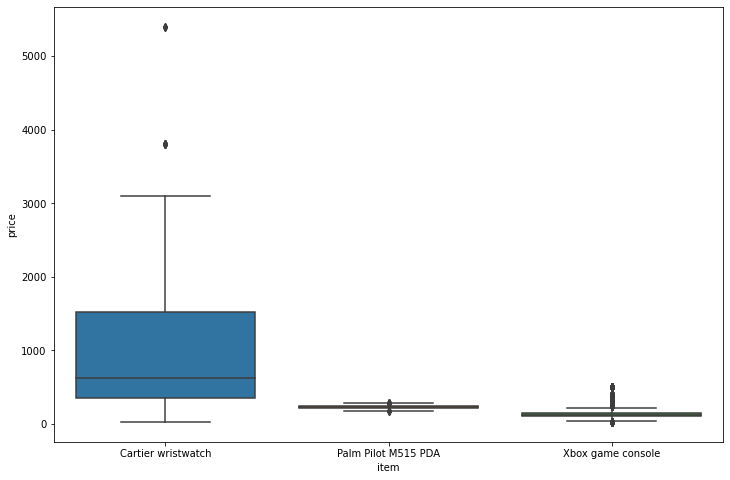

In [16]:
plt.figure(figsize=(12,8))
sns.boxplot(x=auction.item,y=auction.price)

In [18]:
auction['auction_type'].value_counts().apply(lambda x:(x/10654)*100)

7 day auction    66.087854
3 day auction    18.988173
5 day auction    15.177398
Name: auction_type, dtype: float64

<AxesSubplot:title={'center':'perc of auction types'}>

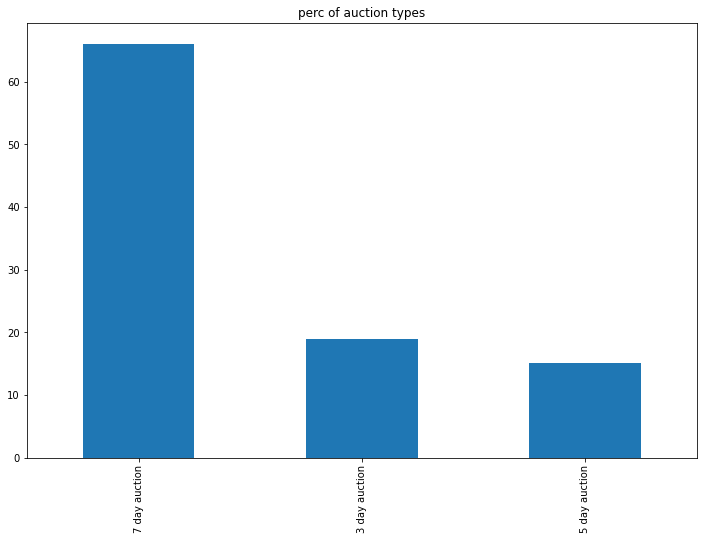

In [20]:
plt.figure(figsize=(12,8))
(auction['auction_type'].value_counts().apply(lambda x:(x/10654)*100)).plot(kind='bar',title="perc of auction types")

Percentage breakdown of three types of auctions



7 day auction    66.087854




3 day auction    18.988173



5 day auction    15.177398

Text(0.5, 1.0, 'Number of items sold by auction')

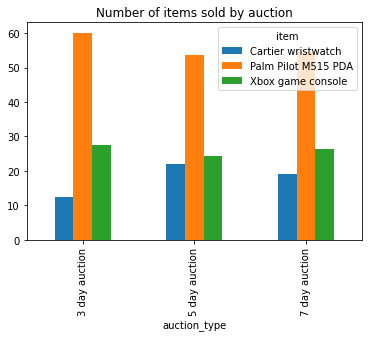

In [21]:
pd.crosstab(auction.auction_type,auction.item).apply(lambda x:100*x/sum(x),axis=1).plot(kind='bar').set_title("Number of items sold by auction")

In [22]:
pd.crosstab(auction.auction_type,auction.item).apply(lambda x:100*x/sum(x),axis=1)

item,Cartier wristwatch,Palm Pilot M515 PDA,Xbox game console
auction_type,,,
3 day auction,12.357884,60.108749,27.533366
5 day auction,21.954236,53.741497,24.304267
7 day auction,19.145008,54.424087,26.430905


In [23]:
auction.pivot_table(index='auction_type',columns='item',values='price',aggfunc=np.median )

item,Cartier wristwatch,Palm Pilot M515 PDA,Xbox game console
auction_type,,,
3 day auction,405.00,225.0,122.5
5 day auction,731.21,232.5,122.5
7 day auction,623.26,232.5,132.5


Text(0.5, 1.0, 'Median price of items auctioned by type')

<Figure size 1440x576 with 0 Axes>

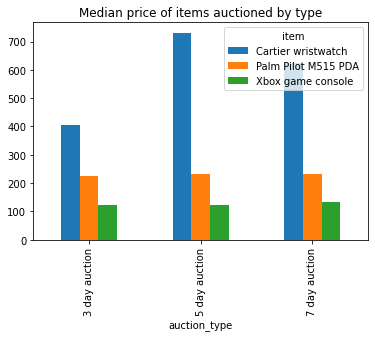

In [30]:
plt.figure(figsize=(20,8))
(auction.pivot_table(index='auction_type',columns='item',values='price',aggfunc=np.median )).plot(kind='bar').set_title("Median price of items auctioned by type")


Text(0.5, 1.0, 'Median Open bid of items by type')

<Figure size 864x576 with 0 Axes>

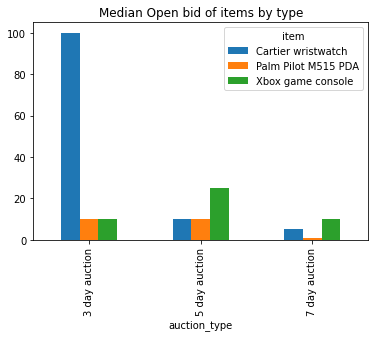

In [31]:
plt.figure(figsize=(12,8))
auction.pivot_table(index='auction_type',columns='item',values='openbid',aggfunc=np.median).plot(kind='bar').set_title("Median Open bid of items by type")

Distributions


C:\Users\Vinayak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

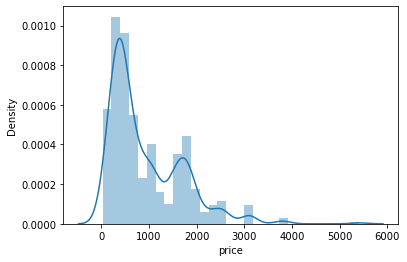

In [32]:
sns.distplot(auction.loc[auction.item=='Cartier wristwatch'].price)

C:\Users\Vinayak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

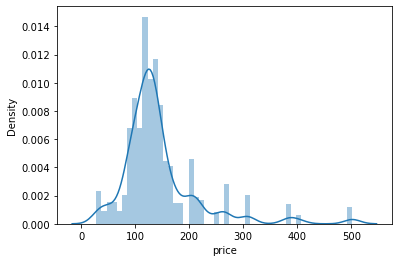

In [33]:
sns.distplot(auction.loc[auction.item=='Xbox game console'].price)

C:\Users\Vinayak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

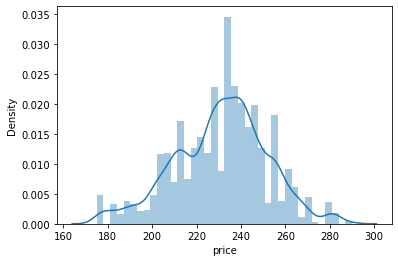

In [34]:
sns.distplot(auction.loc[auction.item=='Palm Pilot M515 PDA'].price)

Text(0.5, 1.0, 'Do lower bids result in more people participating')

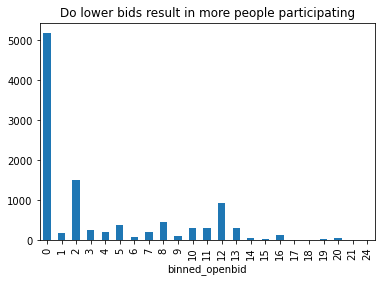

In [35]:
binned=[2,5,10,15,20,30,40,50,60,70,90,100,200,300,400,500,600,700,800,1000,2000,3000,4000,5000]
auction['binned_openbid']=np.digitize(auction.openbid,binned)
auction.groupby('binned_openbid').price.count().plot(kind='bar').set_title("Do lower bids result in more people participating")

Text(0.5, 1.0, 'Do lower bids result in better prices')

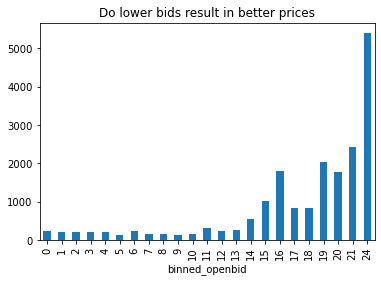

In [36]:
auction.groupby('binned_openbid').price.median().plot(kind='bar').set_title("Do lower bids result in better prices")